# 라이브러리 초기 설정


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=8) 

In [17]:
Dataset = pd.read_csv(r'C:\Users\hyssk\AICE_\JEJU\open\train.csv',encoding='UTF8',usecols=['item','corporation','location','supply(kg)','price(원/kg)'])
Dataset

,item,corporation,location,supply(kg),price(원/kg)
0,TG,A,J,0.0,0.0
1,TG,A,J,0.0,0.0
2,TG,A,J,60601.0,1728.0
3,TG,A,J,25000.0,1408.0
4,TG,A,J,32352.0,1250.0
...,...,...,...,...,...
59392,RD,F,J,452440.0,468.0
59393,RD,F,J,421980.0,531.0
59394,RD,F,J,382980.0,574.0
59395,RD,F,J,477220.0,523.0


In [25]:
oh=OneHotEncoder()
for i in ['item','corporation','location']:
    encoding = oh.fit_transform(Dataset[[i]]).toarray()
    df=pd.DataFrame(encoding,columns = oh.get_feature_names_out())
    Dataset=pd.concat([Dataset,df],axis=1)


In [27]:
Dataset.drop(columns=['item','corporation','location'],inplace=True)
Dataset

,supply(kg),price(원/kg),item_BC,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60601.0,1728.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25000.0,1408.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32352.0,1250.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,452440.0,468.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59393,421980.0,531.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59394,382980.0,574.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59395,477220.0,523.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# 분리


In [34]:
X=Dataset.drop(columns=['price(원/kg)'])
y=Dataset.pop(item='price(원/kg)')

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,supply(kg),item_BC,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
3607,1719.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28882,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40072,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29223,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50088,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,488.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
38158,25180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,450.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
X_test

,supply(kg),item_BC,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
2980,53392.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5246,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
22657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58134,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13361,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17805,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20220,53160.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
40217,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [44]:
y_test

2980     2552.0
5246        0.0
22657       0.0
58134       0.0
13361       0.0
          ...  
17805       0.0
20220    1240.0
40217       0.0
19597       0.0
56822    1723.0
Name: price(원/kg), Length: 11880, dtype: float64

In [49]:
dt,et=DecisionTreeRegressor(),ExtraTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
predicton=dt.predict(X_test)
predicton

array([1899.,    0.,    0., ...,    0.,    0.,  382.])

In [50]:
mean_squared_error(y_test,predicton,squared=False)

833.9822644641663

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [60]:
len(X_train.columns)

14

In [73]:
model=Sequential([
    Dense(64,input_shape=(len(X_train.columns),)),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1,activation='linear')
])
optimizer=tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mae',optimizer=optimizer,metrics=['mae','mse'])
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1485/1485 [==============================] - 2s 915us/step - loss: 1130.6903 - mae: 1130.6903 - mse: 5712675.5000 - val_loss: 1121.7366 - val_mae: 1121.7366 - val_mse: 5318700.5000
Epoch 2/100
1485/1485 [==============================] - 1s 814us/step - loss: 1114.1292 - mae: 1114.1292 - mse: 5475611.0000 - val_loss: 1120.8507 - val_mae: 1120.8507 - val_mse: 5449562.0000
Epoch 3/100
1485/1485 [==============================] - 1s 792us/step - loss: 1109.4302 - mae: 1109.4302 - mse: 5413484.5000 - val_loss: 1123.6866 - val_mae: 1123.6866 - val_mse: 5329550.5000
Epoch 4/100
1485/1485 [==============================] - 1s 787us/step - loss: 1109.6488 - mae: 1109.6488 - mse: 5378481.5000 - val_loss: 1122.6311 - val_mae: 1122.6311 - val_mse: 5544597.0000
Epoch 5/100
1485/1485 [==============================] - 1s 801us/step - loss: 1107.5253 - mae: 1107.5253 - mse: 5391517.5000 - val_loss: 1117.1161 - val_mae: 1117.1161 - val_mse: 5288331.0000
Epoch 6/100
1485/1485 [============

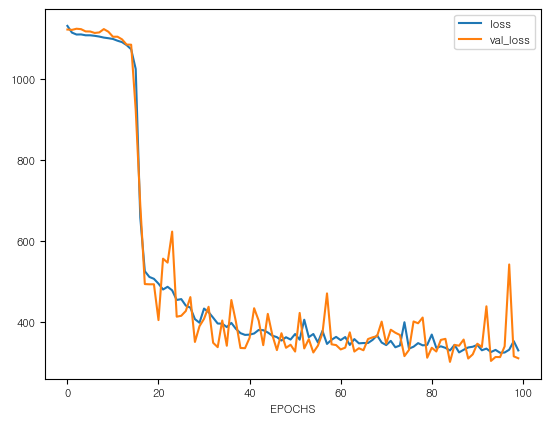

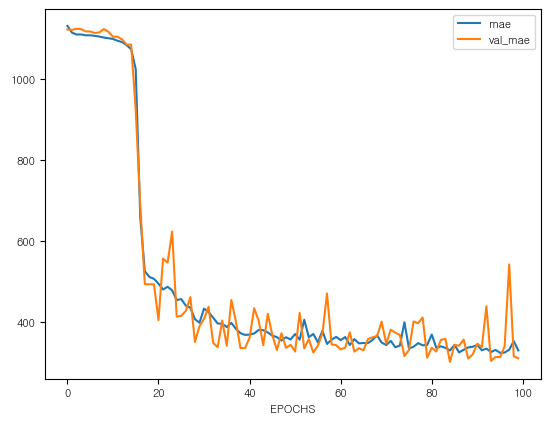

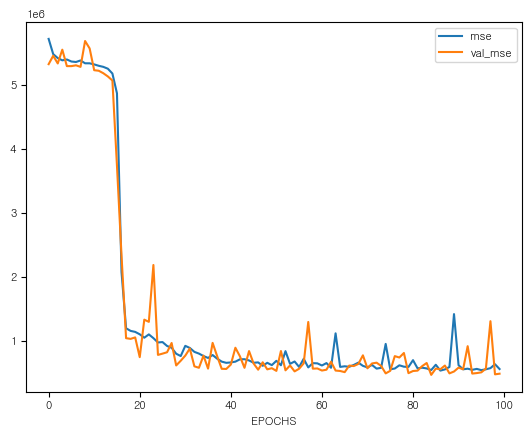

In [84]:
plt.figure()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel("EPOCHS")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['mae'],label='mae')
plt.plot(history.history['val_mae'],label='val_mae')
plt.xlabel("EPOCHS")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['mse'],label='mse')
plt.plot(history.history['val_mse'],label='val_mse')
plt.legend()
plt.xlabel("EPOCHS")
plt.show()